In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [2]:
#df2=pd.read_csv('WimbledonUSOpen2016-2020Forskydt.csv')
df = pd.read_csv('Akkumulated_tennis_PR.csv')
surface=[]
for i in range(len(df)):
    if df.match_id.iloc[i][5] == "u":
        surface.append(0)
    else:
        surface.append(1)
df['surface']=surface

# Tennis_slam_pointbypoint

## Serve position

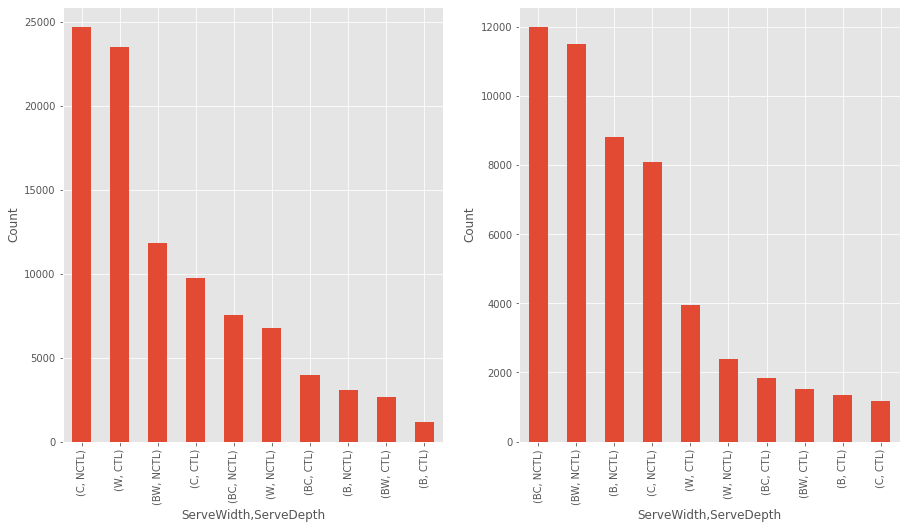

In [3]:
df_serve1 = df.loc[df['ServeNumber'] == 1]
df_serve2 = df.loc[df['ServeNumber'] == 2]

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2)
df_serve1[['ServeWidth','ServeDepth']].value_counts().plot(figsize=(15, 8),
                                                           ax=axes[0],
                                                           kind='bar',
                                                        
                                                           ylabel="Count",
                                                           fontsize=10);
df_serve2[['ServeWidth','ServeDepth']].value_counts().plot(figsize=(15, 8),
                                                           ax=axes[1],
                                                           kind='bar',
                                                           
                                                           ylabel="Count",
                                                           fontsize=10);

In [4]:
round(df_serve1[['ServeWidth','ServeDepth']].value_counts()/df_serve1[['ServeWidth','ServeDepth']].value_counts().sum()*100,1)

ServeWidth  ServeDepth
C           NCTL          26.0
W           CTL           24.8
BW          NCTL          12.4
C           CTL           10.3
BC          NCTL           7.9
W           NCTL           7.1
BC          CTL            4.2
B           NCTL           3.3
BW          CTL            2.8
B           CTL            1.2
dtype: float64

In [5]:
round(df_serve2[['ServeWidth','ServeDepth']].value_counts()/df_serve2[['ServeWidth','ServeDepth']].value_counts().sum()*100,1)

ServeWidth  ServeDepth
BC          NCTL          22.8
BW          NCTL          21.9
B           NCTL          16.7
C           NCTL          15.4
W           CTL            7.5
            NCTL           4.5
BC          CTL            3.5
BW          CTL            2.9
B           CTL            2.5
C           CTL            2.2
dtype: float64

## Win procent of serves

In [6]:
a = 0
b = 0
c = 0
d = 0
df_serve1 = df.loc[df['ServeNumber'] == 1]
df_serve2 = df.loc[df['ServeNumber'] == 2]

for i in range(len(df)):
    if df.ServeNumber[i] == 1 and df.PointWinner[i] == df.PointServer[i]:
        a = a + 1
        
    if df.ServeNumber[i] == 2 and df.PointWinner[i] == df.PointServer[i]:
        b = b + 1
        #c = c + 1
        
    if df.PointWinner[i] == df.PointServer[i]:
        d = d + 1
    c = c + 1
    
print(f'1st serve win percentage is {(a/len(df_serve1))*100}%')
print(f'2nd serve win percentage is {(b/len(df_serve2))*100}%')
print(f'Server win percentage is {(d/c)*100}%')
        

1st serve win percentage is 73.23110895563971%
2nd serve win percentage is 57.18029640293081%
Server win percentage is 64.77809194014678%


## Return from second and first serve

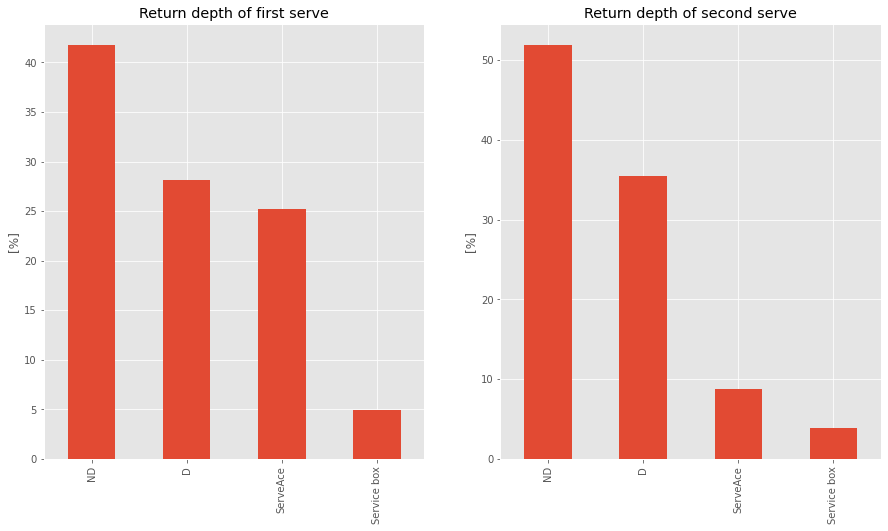

In [7]:
df_serve1 = df.loc[df['ServeNumber'] == 1]
df_serve2 = df.loc[df['ServeNumber'] == 2]

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2)
(df_serve1['ReturnDepth'].value_counts()/df_serve1[['ReturnDepth']].value_counts().sum()*100).plot(figsize=(15, 8),
                                                           ax=axes[0],
                                                           kind='bar',
                                                        title = "Return depth of first serve",
                                                           ylabel="[%]",
                                                           fontsize=10);

(df_serve2['ReturnDepth'].value_counts()/df_serve2[['ReturnDepth']].value_counts().sum()*100).plot(figsize=(15, 8),
                                                           ax=axes[1],
                                                           kind='bar',
                                                           title = "Return depth of second serve",
                                                           ylabel="[%]",
                                                           fontsize=10);

/var/folders/jw/v2qdvl710w5fpqm7sfwqbjkr0000gn/T/ipykernel_44145/1105554666.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Return1st.png',box='tight',dpi=300)


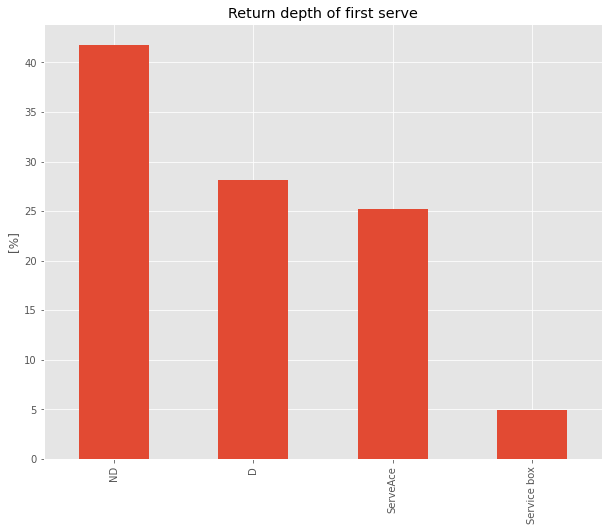

In [8]:
df_serve1 = df.loc[df['ServeNumber'] == 1]

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=1)
(df_serve1['ReturnDepth'].value_counts()/df_serve1[['ReturnDepth']].value_counts().sum()*100).plot(figsize=(10, 8),
                                                           #ax=axes[0],
                                                           kind='bar',
                                                        title = "Return depth of first serve",
                                                           ylabel="[%]",
                                                           fontsize=10);
plt.savefig('Return1st.png',box='tight',dpi=300)

/var/folders/jw/v2qdvl710w5fpqm7sfwqbjkr0000gn/T/ipykernel_44145/233764402.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Return2st.png',box='tight',dpi=300)


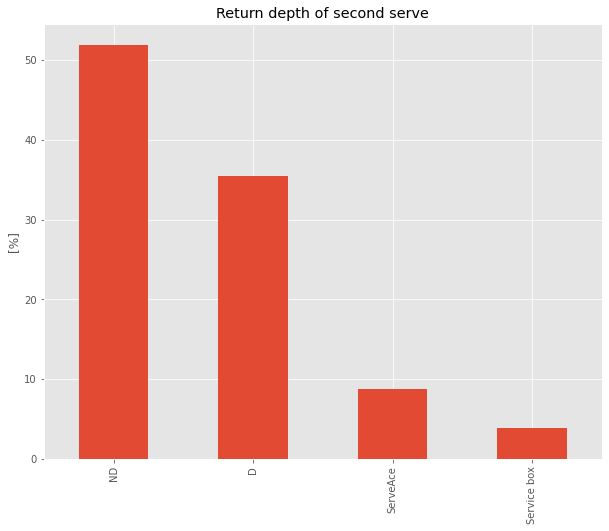

In [9]:
df_serve2 = df.loc[df['ServeNumber'] == 2]
plt.style.use('ggplot')
(df_serve2['ReturnDepth'].value_counts()/df_serve2[['ReturnDepth']].value_counts().sum()*100).plot(figsize=(10, 8),
                                                           #ax=axes[1],
                                                           kind='bar',
                                                           title = "Return depth of second serve",
                                                           ylabel="[%]",
                                                           fontsize=10);
plt.savefig('Return2st.png',box='tight',dpi=300)

## Win percentage of return

In [10]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0

df_ND = df.loc[df['ReturnDepth'] == 'ND']
df_D = df.loc[df['ReturnDepth'] == 'D']
df_Servicebox = df.loc[df['ReturnDepth'] == 'Service box']
df_ServeAce = df.loc[df['ReturnDepth'] == 'ServeAce']

for i in range(len(df)):
    if df.PointWinner[i] != df.PointServer[i] and df.ReturnDepth[i] == 'ND':
        a = a + 1
        
    if df.PointWinner[i] != df.PointServer[i] and df.ReturnDepth[i] == 'D':
        b = b + 1
    
    if df.PointWinner[i] != df.PointServer[i] and df.ReturnDepth[i] == 'Service box':
        e = e + 1
    
    if df.PointWinner[i] != df.PointServer[i] and df.ReturnDepth[i] == 'ServeAce':
        f = f + 1
        
    if df.PointWinner[i] != df.PointServer[i]:
        d = d + 1
    c = c + 1
    
print(f'Not deep return ball win percentage is {(a/len(df_ND))*100}%')
print(f'Deep return ball win percentage is {(b/len(df_D))*100}%')
print(f'Service box return ball win percentage is {(e/len(df_Servicebox))*100}%')
print(f'Service ace return ball win percentage is {(f/len(df_ServeAce))*100}%')
print(f'Returner win percentage is {(d/c)*100}%')

Not deep return ball win percentage is 41.675166846384755%
Deep return ball win percentage is 38.21761702677667%
Service box return ball win percentage is 40.90776415645067%
Service ace return ball win percentage is 0.0%
Returner win percentage is 35.22190805985323%


## Rally count of points

/Users/martinillum/opt/anaconda3/envs/Kandidat_2_semester/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


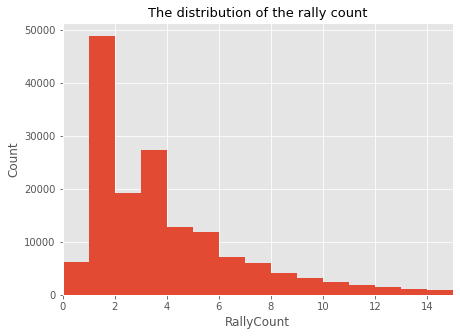

In [11]:
#a = df['RallyCount']
a = df[df['RallyCount'] <= 15]['RallyCount']
plt.style.use('ggplot')
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

fig, ax = plt.subplots(figsize=(7,5))
sns.distplot(a, kde = False, bins = bins,  hist_kws=dict(alpha=1))
ax.set_xlim(0,15)
#ax.set_xticks(range(0,15))
plt.title('The distribution of the rally count', fontsize=13)
plt.ylabel('Count')
plt.show()
#fig.savefig("RallyCount",bbox_inches='tight',dpi=300)

## Win percentage compared to rally length

In [12]:
RWinRate = []

for i in range(0,20,2):
    A = df[(df.RallyCount == i) | (df.RallyCount == i + 1)]
    a = 0
    d = 0
    for j in A.index:
        
        if A.PointWinner[j] != A.PointServer[j]:
            a = a + 1
        d = d + 1
    RWinRate.append((a/d)*100)

In [13]:
RWinRate

[11.392611372691054,
 41.329275349893905,
 51.78825731374863,
 54.22075428220293,
 55.84469227591904,
 56.2916954221302,
 57.50798722044729,
 54.937867887508176,
 56.35964912280702,
 59.346642468239565]

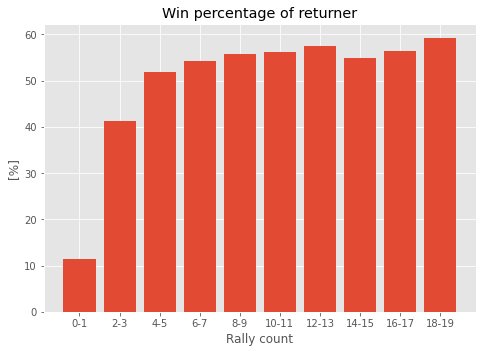

In [14]:
fig = plt.figure()
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])
langs = ['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19']
students = RWinRate
ax.bar(langs,students)
ax.set_ylabel('[%]')
ax.set_xlabel('Rally count')
ax.set_title('Win percentage of returner')
plt.show()
#fig.savefig("RallyWinP",bbox_inches='tight',dpi=300)

# Tennis_atp

In [15]:
df[['winner_rank','loser_rank']].describe()

,winner_rank,loser_rank
count,157385.000000,157222.000000
mean,35.388862,78.362106
std,50.031736,111.603561
min,1.000000,1.000000
25%,7.000000,23.000000
50%,21.000000,53.000000
75%,44.000000,95.000000
max,589.000000,1415.000000


## Win percentage on the different surfaces

In [16]:
df[["surface"]].value_counts()

surface
0          87202
1          70183
dtype: int64

In [17]:
winnerH = 0
winnerG = 0
loserH = 0
loserG = 0

for i in range(len(df.match_id.unique())):
    if df[df.match_id == df.match_id.unique()[i]].iloc[0].winner_rank > df[df.match_id == df.match_id.unique()[i]].iloc[0].loser_rank and df[df.match_id == df.match_id.unique()[i]].iloc[0].surface == 0:
        winnerH = winnerH + 1
    
    if df[df.match_id == df.match_id.unique()[i]].iloc[0].winner_rank > df[df.match_id == df.match_id.unique()[i]].iloc[0].loser_rank and df[df.match_id == df.match_id.unique()[i]].iloc[0].surface == 1:
        winnerG = winnerG + 1
    
    if df[df.match_id == df.match_id.unique()[i]].iloc[0].winner_rank < df[df.match_id == df.match_id.unique()[i]].iloc[0].loser_rank and df[df.match_id == df.match_id.unique()[i]].iloc[0].surface == 0:
        loserH = winnerH + 1
    
    if df[df.match_id == df.match_id.unique()[i]].iloc[0].winner_rank < df[df.match_id == df.match_id.unique()[i]].iloc[0].loser_rank and df[df.match_id == df.match_id.unique()[i]].iloc[0].surface == 1:
        loserG = loserG + 1

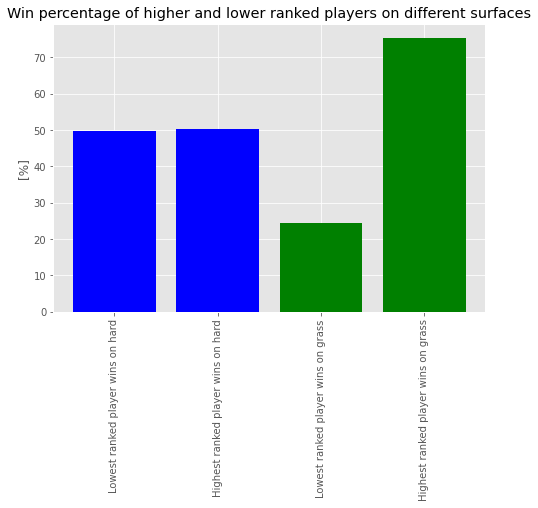

In [18]:
LWH = (winnerH/(winnerH+loserH))*100
HWH = (loserH/(winnerH+loserH))*100
LWG = (winnerG/(winnerG+loserG))*100
HWG = (loserG/(winnerG+loserG))*100

fig = plt.figure()
plt.style.use('ggplot')
ax = fig.add_axes([0,0,1,1])
barWidth = 0.25
langs = ['Lowest ranked player wins on hard', 'Highest ranked player wins on hard', 'Lowest ranked player wins on grass', 'Highest ranked player wins on grass']
students = [LWH, HWH, LWG, HWG]

ax.bar(langs,students, color = ['blue', 'blue', 'green', 'green'])
plt.xticks(rotation = 90)
ax.set_ylabel('[%]')
ax.set_title('Win percentage of higher and lower ranked players on different surfaces')
plt.show()
fig.savefig("surfaceWin",bbox_inches='tight',dpi=300)